# <b> <center style="background-color:DodgerBlue;"> DL Assignment 1-Group 299 </center> </b>

### Question No.1 

NLP Dataset: Dataset consisting of 20k reviews from trip advisor.

Links to an external site. (Links to an external site.) : https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

    (6 marks)

 

Import Libraries/Dataset (0 mark)
Import the required libraries and the dataset (use Google Drive if required).
Check the GPU available (recommended- use free GPU provided by Google Colab).
 

Data Visualization (0.75 mark)
Print at least two records from each class of the dataset, for a sanity check that labels match the text.
Plot a bar graph of class distribution in the dataset. Each bar depicts the number of records belonging to a particular class in the dataset. (recommended - matplotlib/seaborn libraries)
Any other visualizations that seem appropriate for this problem are encouraged but not necessary, for the points.
Print the shapes of train and test data.
 

Data Pre-processing (0.25 mark)
Need for this Step- Since the models we use cannot accept string inputs or cannot be of the string format. We have to come up with a way of handling this step. The discussion of different ways of handling this step is out of the scope of this assignment.
Please usethis pre-trained embedding layer  (Links to an external site.) : https://tfhub.dev/google/nnlm-en-dim128/2
Links to an external site. (Links to an external site.) : https://tfhub.dev/google/nnlm-en-dim128/2
from TensorFlow hub for this assignment. This link also has a code snippet on how to convert a sentence to a vector. Refer to that for further clarity on this subject.
Bring the train and test data in the required format.
 

Model Building (0.2*5 = 1 mark)
Sequential Model layers- Use AT LEAST 5 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
Add L1 regularization to all the layers.
Add one layer of dropout at the appropriate position and give reasons.
Choose the appropriate activation function for all the layers.
Print the model summary.   
 

Model Compilation (0.25 mark)
Compile the model with the appropriate loss function.
Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
Use accuracy as a metric.
 

Model Training (0.5 + 0.25 = 0.75 mark)
Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.
 

Model Evaluation (0.5 + 0.5 = 1 mark)
Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
Print the two most incorrectly classified records for each class in the test dataset.
 

Hyperparameter Tuning- Build two more models by changing the following hyperparameters one at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. (1 + 1 = 2 marks)

Regularization: Train a model without regularization
Dropout:Change the position and value of dropout layer
Write a comparison between each model and give reasons for the difference in results.

 


#### -*- coding: utf-8 -*-
#### Indentation: Jupyter Notebook

__version__='1.0.0'
__author__="Sourav Raj, Nitin Agarwal, Anusha linda kostka j e"
__email__="2020sc04304@wilp.bits-pilani.ac.in; 2020sc04557@wilp.bits-pilani.ac.in; 2020sc04900@wilp.bits-pilani.ac.in"

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ANN
import keras 
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras import regularizers
import tensorflow_hub as hub
from sklearn.metrics import classification_report,confusion_matrix


In [2]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
#tf.set_random_seed(42)  # sets the graph-level random seed
tf.random.set_seed(42)

### Import data

In [3]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
print(data.shape)
data.head(2)

(20491, 2)


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2


### Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
data.isnull().sum()
#No data Missing

Review    0
Rating    0
dtype: int64

In [8]:
data['Rating'].unique()
#Five Labels for Classification

array([4, 2, 3, 5, 1], dtype=int64)

In [10]:
#checking counts for each label
data['Rating'].value_counts()
#Maximum is 5 Min is 1

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

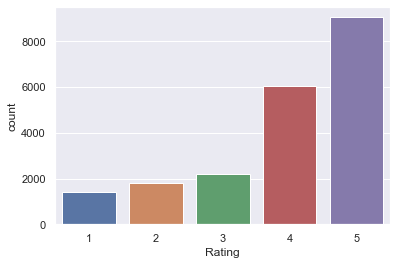

In [12]:
#Plotting Class labels on a Graph
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Rating", data=data)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

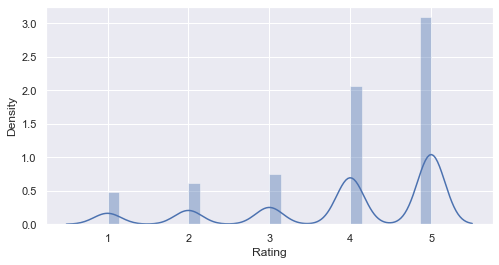

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
sns.distplot(data['Rating'])

In [21]:
for i in range(1,6):
    print(data.loc[data['Rating'] == i].head(2))

                                               Review  Rating
15  horrible customer service hotel stay february ...       1
32  noise airconditioner-a standard, arranged stay...       1
                                               Review  Rating
1   ok nothing special charge diamond member hilto...       2
10  poor value stayed monaco seattle july, nice ho...       2
                                               Review  Rating
2   nice rooms not 4* experience hotel monaco seat...       3
13  nice hotel not nice staff hotel lovely staff q...       3
                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
7  excellent staff, housekeeping quality hotel ch...       4
                                              Review  Rating
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


## Data Preprocessing

Splitting the data into two parts 70% for training and 30% for validation

In [108]:
Predictor=data.loc[:,['Review']].values
Target=data.loc[:,'Rating'].values

X_train, X_test, y_train, y_test = train_test_split(Predictor, Target, test_size=0.3, random_state=42, stratify=Target)
print(f'Shape of Training data is {len(X_train)}')
print(f'Shape of Testing data is {len(X_test)}')
      

Shape of Training data is 14343
Shape of Testing data is 6148


In [109]:
X_train = np.reshape(X_train,len(X_train))
X_test = np.reshape(X_test,len(X_test))
#Pre-trained text embedding

embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")
X_train = embed(X_train)
X_test = embed(X_test)

In [110]:
print(f'Shape of Training data is {len(X_train), len(X_train[0])}')
print(f'Shape of Testing data is {len(X_test), len(X_test[0])}')

Shape of Training data is (14343, 128)
Shape of Testing data is (6148, 128)


In [111]:
y_train, y_test=y_train-1, y_test-1
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)
print(y_train[0], y_test[0])

[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.]


### Model Building

<b> learning rate: </b> The range of values to consider for the learning rate should be between 10^-6 to 1. A traditional default value for the learning rate is 0.1 or 0.01 which is a good starting point for any problem and this can be further optimize with Hyper parameter tuning. In this problem after several iteration & testing we are taking 0.001 as starting point as its convergence is faster. 

<b> Activation function: </b> As this problem is binary classification problem, we choose sigmoid in the output layer and relu in the hidden layer as its performance is better and doesn't have exploding/vanishing gradient problem. In addition we can also choose hidden layer activation function using hyper parameter tuning.

<b> loss function: </b> Binary crossentropy is used as a loss function for this problem as we have binary class at the target variable.

<b> optimizer: </b> Adam optimizer is used which generally prefer over others.

In addition variable learning rate with factor of 0.5 is used if val_loss is not improving for 10 consecutive patience. 

Early Stopping criteria is used if val_loss is not improving for 50 patience. 

Dropout layer of 0.1 is also added to avoid overfitting in the model

In [91]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, input_dim = 128, activation='relu'))
# The Hidden Layer :
NN_model.add(Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dropout(rate=0.1))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(16,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))

# The Output Layer :
NN_model.add(Dense(5, activation='softmax'))

print(NN_model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_31 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 16)               

### Model Compilation

In [92]:
adam=Adam(learning_rate=0.0001)
NN_model.compile( optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'] )

### Model Training

In [93]:
start_=time.time()
print(f'Model training is started at {start_}')
NN_model_hist = NN_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))
end_=time.time()
print(f'Model training is finished at {end_} & it took {round(end_-start_, 0)} sec')

Model training is started at 1656181888.305475
Epoch 1/200
225/225 [==============================] - 1s 6ms/step - loss: 4.6561 - accuracy: 0.3800 - val_loss: 4.0541 - val_accuracy: 0.4419
Epoch 2/200
225/225 [==============================] - 1s 5ms/step - loss: 3.5657 - accuracy: 0.4603 - val_loss: 3.1248 - val_accuracy: 0.4893
Epoch 3/200
225/225 [==============================] - 1s 5ms/step - loss: 2.7792 - accuracy: 0.5035 - val_loss: 2.4596 - val_accuracy: 0.5054
Epoch 4/200
225/225 [==============================] - 1s 5ms/step - loss: 2.2081 - accuracy: 0.5140 - val_loss: 1.9799 - val_accuracy: 0.5091
Epoch 5/200
225/225 [==============================] - 1s 5ms/step - loss: 1.8145 - accuracy: 0.5196 - val_loss: 1.6716 - val_accuracy: 0.5128
Epoch 6/200
225/225 [==============================] - 1s 5ms/step - loss: 1.5866 - accuracy: 0.5218 - val_loss: 1.5233 - val_accuracy: 0.5120
Epoch 7/200
225/225 [==============================] - 1s 5ms/step - loss: 1.4805 - accuracy: 0

225/225 [==============================] - 1s 5ms/step - loss: 1.0922 - accuracy: 0.5748 - val_loss: 1.1084 - val_accuracy: 0.5636
Epoch 58/200
225/225 [==============================] - 1s 5ms/step - loss: 1.0906 - accuracy: 0.5752 - val_loss: 1.1114 - val_accuracy: 0.5626
Epoch 59/200
225/225 [==============================] - 1s 5ms/step - loss: 1.0872 - accuracy: 0.5773 - val_loss: 1.1071 - val_accuracy: 0.5660
Epoch 60/200
225/225 [==============================] - 1s 5ms/step - loss: 1.0847 - accuracy: 0.5764 - val_loss: 1.1128 - val_accuracy: 0.5644
Epoch 61/200
225/225 [==============================] - 1s 5ms/step - loss: 1.0842 - accuracy: 0.5769 - val_loss: 1.1061 - val_accuracy: 0.5613
Epoch 62/200
225/225 [==============================] - 1s 5ms/step - loss: 1.0803 - accuracy: 0.5790 - val_loss: 1.1035 - val_accuracy: 0.5631
Epoch 63/200
225/225 [==============================] - 1s 5ms/step - loss: 1.0806 - accuracy: 0.5776 - val_loss: 1.1021 - val_accuracy: 0.5657
Epoch

Epoch 114/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0063 - accuracy: 0.6061 - val_loss: 1.0861 - val_accuracy: 0.5665
Epoch 115/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0056 - accuracy: 0.6064 - val_loss: 1.0861 - val_accuracy: 0.5655
Epoch 116/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0030 - accuracy: 0.6083 - val_loss: 1.0872 - val_accuracy: 0.5703
Epoch 117/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0015 - accuracy: 0.6051 - val_loss: 1.0861 - val_accuracy: 0.5680
Epoch 118/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0014 - accuracy: 0.6065 - val_loss: 1.0873 - val_accuracy: 0.5688
Epoch 119/200
225/225 [==============================] - 1s 7ms/step - loss: 1.0010 - accuracy: 0.6103 - val_loss: 1.0876 - val_accuracy: 0.5662
Epoch 120/200
225/225 [==============================] - 2s 7ms/step - loss: 0.9976 - accuracy: 0.6125 - val_loss: 1.0866 - val_ac

225/225 [==============================] - 2s 7ms/step - loss: 0.9217 - accuracy: 0.6451 - val_loss: 1.1416 - val_accuracy: 0.5504
Epoch 171/200
225/225 [==============================] - 2s 7ms/step - loss: 0.9234 - accuracy: 0.6480 - val_loss: 1.1480 - val_accuracy: 0.5550
Epoch 172/200
225/225 [==============================] - 2s 7ms/step - loss: 0.9198 - accuracy: 0.6449 - val_loss: 1.1472 - val_accuracy: 0.5504
Epoch 173/200
225/225 [==============================] - 2s 7ms/step - loss: 0.9180 - accuracy: 0.6489 - val_loss: 1.1480 - val_accuracy: 0.5516
Epoch 174/200
225/225 [==============================] - 2s 7ms/step - loss: 0.9179 - accuracy: 0.6466 - val_loss: 1.1522 - val_accuracy: 0.5467
Epoch 175/200
225/225 [==============================] - 2s 7ms/step - loss: 0.9151 - accuracy: 0.6485 - val_loss: 1.1598 - val_accuracy: 0.5551
Epoch 176/200
225/225 [==============================] - 2s 7ms/step - loss: 0.9149 - accuracy: 0.6550 - val_loss: 1.1681 - val_accuracy: 0.5543

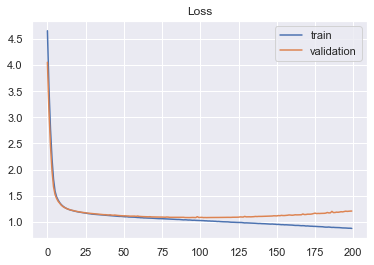

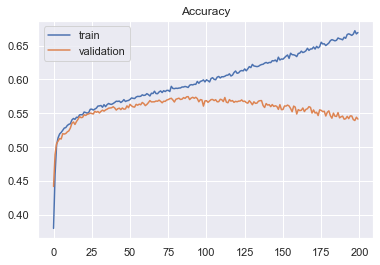

In [94]:
plt.title(f'Loss')
plt.plot(NN_model_hist.history['loss'], label='train')
plt.plot(NN_model_hist.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'Accuracy')
plt.plot(NN_model_hist.history['accuracy'], label='train')
plt.plot(NN_model_hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

### Model Evaluation

In [95]:
Evaluation_summary=pd.DataFrame()
print(f"Final training loss : {NN_model_hist.history['loss'][-1]}")
print(f"Final training accuracy:  {NN_model_hist.history['accuracy'][-1]}")
print(f"Final validation loss : {NN_model_hist.history['val_loss'][-1]}")
print(f"Final validation accuracy : {NN_model_hist.history['val_accuracy'][-1]}")
Evaluation_summary=Evaluation_summary.append(pd.DataFrame({ \
            'Train Loss':[NN_model_hist.history['loss'][-1]], 'Train Accuracy': [NN_model_hist.history['accuracy'][-1]], \
                'Validation Loss':[NN_model_hist.history['val_loss'][-1]], 'Validation Accuracy': [NN_model_hist.history['val_accuracy'][-1]]}), ignore_index=True)

Final training loss : 0.8758621215820312
Final training accuracy:  0.6692463159561157
Final validation loss : 1.2082183361053467
Final validation accuracy : 0.5414769053459167


In [96]:
testLoss, testAccuracy = NN_model.evaluate( X_test, y_test)

193/193 [==============================] - 0s 2ms/step - loss: 1.2082 - accuracy: 0.5415


In [103]:
y_pred = NN_model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_=np.argmax(y_test_, axis=1)
cm=confusion_matrix(y_test_, y_pred)
print(f'Confusion matrix:')
print(cm)
print(f'Classification Report:')
clReport=classification_report(y_test_, y_pred)
print(clReport)

Confusion matrix:
[[ 255  104   25   23   19]
 [ 135  162   96  107   38]
 [  30  105  122  308   90]
 [  15   47  139  881  730]
 [   3   36   65  704 1909]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       426
           1       0.36      0.30      0.33       538
           2       0.27      0.19      0.22       655
           3       0.44      0.49      0.46      1812
           4       0.69      0.70      0.69      2717

    accuracy                           0.54      6148
   macro avg       0.47      0.45      0.46      6148
weighted avg       0.53      0.54      0.54      6148



From Classification Report we can say that class 4 means Reviews with rating 5 is performing quite well as its f1-score, precision & recall is quite good where as class 2 i.e. review with rating 3 has worst performance.

### HyperParameter Tuning

#### Regularization: Train a model without regularization

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_52 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_53 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_55 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_56 (Dense)             (None, 16)              

Epoch 48/200
225/225 [==============================] - 1s 3ms/step - loss: 0.8586 - accuracy: 0.6170 - val_loss: 0.9846 - val_accuracy: 0.5680
Epoch 49/200
225/225 [==============================] - 1s 3ms/step - loss: 0.8575 - accuracy: 0.6157 - val_loss: 0.9814 - val_accuracy: 0.5699
Epoch 50/200
225/225 [==============================] - 1s 3ms/step - loss: 0.8559 - accuracy: 0.6169 - val_loss: 0.9760 - val_accuracy: 0.5735
Epoch 51/200
225/225 [==============================] - 1s 3ms/step - loss: 0.8536 - accuracy: 0.6183 - val_loss: 0.9868 - val_accuracy: 0.5738
Epoch 52/200
225/225 [==============================] - 1s 3ms/step - loss: 0.8491 - accuracy: 0.6207 - val_loss: 0.9832 - val_accuracy: 0.5706
Epoch 53/200
225/225 [==============================] - 1s 3ms/step - loss: 0.8472 - accuracy: 0.6199 - val_loss: 0.9864 - val_accuracy: 0.5665
Epoch 54/200
225/225 [==============================] - 1s 3ms/step - loss: 0.8418 - accuracy: 0.6219 - val_loss: 1.0115 - val_accuracy:

Epoch 105/200
225/225 [==============================] - 1s 3ms/step - loss: 0.6513 - accuracy: 0.7143 - val_loss: 1.2665 - val_accuracy: 0.5288
Epoch 106/200
225/225 [==============================] - 1s 3ms/step - loss: 0.6505 - accuracy: 0.7176 - val_loss: 1.3190 - val_accuracy: 0.5094
Epoch 107/200
225/225 [==============================] - 1s 3ms/step - loss: 0.6493 - accuracy: 0.7167 - val_loss: 1.3049 - val_accuracy: 0.5299
Epoch 108/200
225/225 [==============================] - 1s 3ms/step - loss: 0.6426 - accuracy: 0.7230 - val_loss: 1.2824 - val_accuracy: 0.5283
Epoch 109/200
225/225 [==============================] - 1s 3ms/step - loss: 0.6363 - accuracy: 0.7245 - val_loss: 1.3028 - val_accuracy: 0.5311
Epoch 110/200
225/225 [==============================] - 1s 3ms/step - loss: 0.6308 - accuracy: 0.7271 - val_loss: 1.3280 - val_accuracy: 0.5267
Epoch 111/200
225/225 [==============================] - 1s 3ms/step - loss: 0.6288 - accuracy: 0.7271 - val_loss: 1.3206 - val_ac

225/225 [==============================] - 1s 4ms/step - loss: 0.4134 - accuracy: 0.8403 - val_loss: 2.1821 - val_accuracy: 0.4925
Epoch 162/200
225/225 [==============================] - 1s 4ms/step - loss: 0.4087 - accuracy: 0.8451 - val_loss: 2.0928 - val_accuracy: 0.5023
Epoch 163/200
225/225 [==============================] - 1s 4ms/step - loss: 0.4006 - accuracy: 0.8491 - val_loss: 2.1576 - val_accuracy: 0.4969
Epoch 164/200
225/225 [==============================] - 1s 4ms/step - loss: 0.3932 - accuracy: 0.8489 - val_loss: 2.1825 - val_accuracy: 0.5016
Epoch 165/200
225/225 [==============================] - 1s 4ms/step - loss: 0.3891 - accuracy: 0.8519 - val_loss: 2.1915 - val_accuracy: 0.5089
Epoch 166/200
225/225 [==============================] - 1s 4ms/step - loss: 0.4060 - accuracy: 0.8434 - val_loss: 2.1718 - val_accuracy: 0.5086
Epoch 167/200
225/225 [==============================] - 1s 4ms/step - loss: 0.3818 - accuracy: 0.8571 - val_loss: 2.3038 - val_accuracy: 0.4945

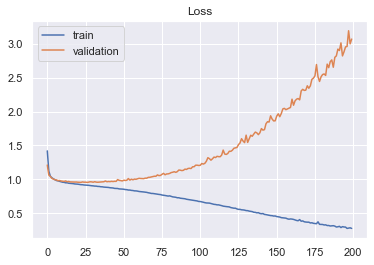

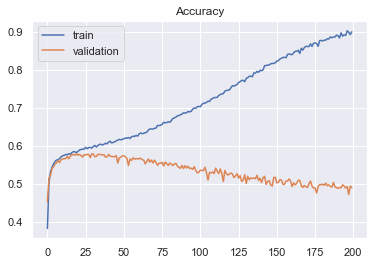

Final training loss : 0.2758086323738098
Final training accuracy:  0.9003695249557495
Final validation loss : 3.0687761306762695
Final validation accuracy : 0.4895901083946228
193/193 [==============================] - 0s 1ms/step - loss: 3.0688 - accuracy: 0.4896
Confusion matrix:
[[ 210  130   43   25   18]
 [ 118  160  118   97   45]
 [  34  138  157  220  106]
 [  18   93  239  733  729]
 [  14   65  156  732 1750]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       426
           1       0.27      0.30      0.28       538
           2       0.22      0.24      0.23       655
           3       0.41      0.40      0.41      1812
           4       0.66      0.64      0.65      2717

    accuracy                           0.49      6148
   macro avg       0.42      0.42      0.42      6148
weighted avg       0.50      0.49      0.49      6148



In [113]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, input_dim = 128, activation='relu'))
# The Hidden Layer :
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(64,activation='relu'))
NN_model.add(Dropout(rate=0.1))
NN_model.add(Dense(32,activation='relu'))
NN_model.add(Dense(32,activation='relu'))
NN_model.add(Dense(16,activation='relu'))

# The Output Layer :
NN_model.add(Dense(5, activation='softmax'))

print(NN_model.summary())

### Model Compilation

adam=Adam(learning_rate=0.0001)
NN_model.compile( optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'] )

### Model Training

start_=time.time()
print(f'Model training is started at {start_}')
NN_model_hist = NN_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))
end_=time.time()
print(f'Model training is finished at {end_} & it took {round(end_-start_, 0)} sec')

plt.title(f'Loss')
plt.plot(NN_model_hist.history['loss'], label='train')
plt.plot(NN_model_hist.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'Accuracy')
plt.plot(NN_model_hist.history['accuracy'], label='train')
plt.plot(NN_model_hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

### Model Evaluation

Evaluation_summary=pd.DataFrame()
print(f"Final training loss : {NN_model_hist.history['loss'][-1]}")
print(f"Final training accuracy:  {NN_model_hist.history['accuracy'][-1]}")
print(f"Final validation loss : {NN_model_hist.history['val_loss'][-1]}")
print(f"Final validation accuracy : {NN_model_hist.history['val_accuracy'][-1]}")
Evaluation_summary=Evaluation_summary.append(pd.DataFrame({ \
            'Train Loss':[NN_model_hist.history['loss'][-1]], 'Train Accuracy': [NN_model_hist.history['accuracy'][-1]], \
                'Validation Loss':[NN_model_hist.history['val_loss'][-1]], 'Validation Accuracy': [NN_model_hist.history['val_accuracy'][-1]]}), ignore_index=True)

testLoss, testAccuracy = NN_model.evaluate(X_test, y_test)

y_test

y_pred = NN_model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_=np.argmax(y_test, axis=1)
cm=confusion_matrix(y_test_, y_pred)
print(f'Confusion matrix:')
print(cm)
print(f'Classification Report:')
clReport=classification_report(y_test_, y_pred)
print(clReport)

#### Dropout:Change the position and value of dropout layer

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_59 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_60 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_61 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_62 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 16)              

Epoch 48/200
225/225 [==============================] - 1s 6ms/step - loss: 1.1234 - accuracy: 0.5417 - val_loss: 1.1120 - val_accuracy: 0.5412
Epoch 49/200
225/225 [==============================] - 1s 6ms/step - loss: 1.1217 - accuracy: 0.5412 - val_loss: 1.1109 - val_accuracy: 0.5412
Epoch 50/200
225/225 [==============================] - 1s 7ms/step - loss: 1.1228 - accuracy: 0.5445 - val_loss: 1.1095 - val_accuracy: 0.5426
Epoch 51/200
225/225 [==============================] - 1s 6ms/step - loss: 1.1175 - accuracy: 0.5442 - val_loss: 1.1088 - val_accuracy: 0.5423
Epoch 52/200
225/225 [==============================] - 1s 7ms/step - loss: 1.1169 - accuracy: 0.5426 - val_loss: 1.1089 - val_accuracy: 0.5446
Epoch 53/200
225/225 [==============================] - 1s 6ms/step - loss: 1.1169 - accuracy: 0.5426 - val_loss: 1.1072 - val_accuracy: 0.5403
Epoch 54/200
225/225 [==============================] - 1s 6ms/step - loss: 1.1107 - accuracy: 0.5474 - val_loss: 1.1063 - val_accuracy:

Epoch 105/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0676 - accuracy: 0.5670 - val_loss: 1.0999 - val_accuracy: 0.5532
Epoch 106/200
225/225 [==============================] - 1s 7ms/step - loss: 1.0614 - accuracy: 0.5667 - val_loss: 1.0990 - val_accuracy: 0.5556
Epoch 107/200
225/225 [==============================] - 1s 7ms/step - loss: 1.0598 - accuracy: 0.5714 - val_loss: 1.1015 - val_accuracy: 0.5568
Epoch 108/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0651 - accuracy: 0.5647 - val_loss: 1.1001 - val_accuracy: 0.5582
Epoch 109/200
225/225 [==============================] - 2s 7ms/step - loss: 1.0576 - accuracy: 0.5680 - val_loss: 1.1013 - val_accuracy: 0.5545
Epoch 110/200
225/225 [==============================] - 1s 7ms/step - loss: 1.0585 - accuracy: 0.5700 - val_loss: 1.1011 - val_accuracy: 0.5542
Epoch 111/200
225/225 [==============================] - 1s 7ms/step - loss: 1.0552 - accuracy: 0.5705 - val_loss: 1.1016 - val_ac

225/225 [==============================] - 1s 6ms/step - loss: 0.9892 - accuracy: 0.6089 - val_loss: 1.1664 - val_accuracy: 0.5449
Epoch 162/200
225/225 [==============================] - 1s 6ms/step - loss: 0.9852 - accuracy: 0.6138 - val_loss: 1.1706 - val_accuracy: 0.5434
Epoch 163/200
225/225 [==============================] - 1s 6ms/step - loss: 0.9825 - accuracy: 0.6129 - val_loss: 1.1728 - val_accuracy: 0.5403
Epoch 164/200
225/225 [==============================] - 1s 6ms/step - loss: 0.9808 - accuracy: 0.6121 - val_loss: 1.1755 - val_accuracy: 0.5460
Epoch 165/200
225/225 [==============================] - 1s 6ms/step - loss: 0.9806 - accuracy: 0.6110 - val_loss: 1.1767 - val_accuracy: 0.5423
Epoch 166/200
225/225 [==============================] - 1s 6ms/step - loss: 0.9763 - accuracy: 0.6126 - val_loss: 1.1749 - val_accuracy: 0.5454
Epoch 167/200
225/225 [==============================] - 1s 6ms/step - loss: 0.9773 - accuracy: 0.6147 - val_loss: 1.1778 - val_accuracy: 0.5460

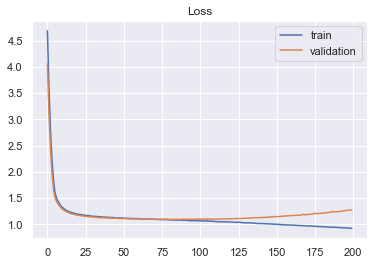

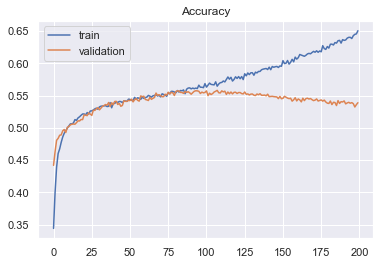

Final training loss : 0.9236853718757629
Final training accuracy:  0.6506309509277344
Final validation loss : 1.2734359502792358
Final validation accuracy : 0.5390371084213257
193/193 [==============================] - 1s 3ms/step - loss: 1.2734 - accuracy: 0.5390
Confusion matrix:
[[ 283   63   31   44    5]
 [ 189  104   80  145   20]
 [  53   92  109  327   74]
 [  27   56  123  860  746]
 [  14   34   73  638 1958]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.66      0.57       426
           1       0.30      0.19      0.23       538
           2       0.26      0.17      0.20       655
           3       0.43      0.47      0.45      1812
           4       0.70      0.72      0.71      2717

    accuracy                           0.54      6148
   macro avg       0.44      0.44      0.43      6148
weighted avg       0.52      0.54      0.53      6148



In [114]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, input_dim = 128, activation='relu'))
# The Hidden Layer :
NN_model.add(Dense(256,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))

NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))
NN_model.add(Dropout(rate=0.5))
NN_model.add(Dense(16,activation='relu', kernel_regularizer=regularizers.l1(0.001),
                activity_regularizer=regularizers.l1(0.001)))

# The Output Layer :
NN_model.add(Dense(5, activation='softmax'))

print(NN_model.summary())

### Model Compilation

adam=Adam(learning_rate=0.0001)
NN_model.compile( optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'] )

### Model Training

start_=time.time()
print(f'Model training is started at {start_}')
NN_model_hist = NN_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))
end_=time.time()
print(f'Model training is finished at {end_} & it took {round(end_-start_, 0)} sec')

plt.title(f'Loss')
plt.plot(NN_model_hist.history['loss'], label='train')
plt.plot(NN_model_hist.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'Accuracy')
plt.plot(NN_model_hist.history['accuracy'], label='train')
plt.plot(NN_model_hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

### Model Evaluation

Evaluation_summary=pd.DataFrame()
print(f"Final training loss : {NN_model_hist.history['loss'][-1]}")
print(f"Final training accuracy:  {NN_model_hist.history['accuracy'][-1]}")
print(f"Final validation loss : {NN_model_hist.history['val_loss'][-1]}")
print(f"Final validation accuracy : {NN_model_hist.history['val_accuracy'][-1]}")
Evaluation_summary=Evaluation_summary.append(pd.DataFrame({ \
            'Train Loss':[NN_model_hist.history['loss'][-1]], 'Train Accuracy': [NN_model_hist.history['accuracy'][-1]], \
                'Validation Loss':[NN_model_hist.history['val_loss'][-1]], 'Validation Accuracy': [NN_model_hist.history['val_accuracy'][-1]]}), ignore_index=True)

testLoss, testAccuracy = NN_model.evaluate(X_test, y_test)

y_pred = NN_model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_=np.argmax(y_test, axis=1)
cm=confusion_matrix(y_test_, y_pred)
print(f'Confusion matrix:')
print(cm)
print(f'Classification Report:')
clReport=classification_report(y_test_, y_pred)
print(clReport)